# Accessing JSON Stat data

In [1]:
from pyjstat import pyjstat

# FutureWarning about sort_index
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt

In [2]:
# Input can be URL or a filelike object.

with open("data/tps00002+ESTAT.json") as handle:
    dataset = pyjstat.Dataset.read(handle)

df = dataset.write('dataframe')

In [3]:
df

,Time frequency,Type of projection,Unit of measure,Sex,Age class,Geopolitical entity (reporting),Time,value
0,Annual,Baseline projections,Person,Total,Total,European Union - 28 countries,2018,512379225
1,Annual,Baseline projections,Person,Total,Total,European Union - 28 countries,2020,514292912
2,Annual,Baseline projections,Person,Total,Total,European Union - 28 countries,2030,520712470
3,Annual,Baseline projections,Person,Total,Total,European Union - 28 countries,2040,524655224
4,Annual,Baseline projections,Person,Total,Total,European Union - 28 countries,2050,523708357
...,...,...,...,...,...,...,...,...
1165,Annual,Baseline projections,Person,Females,Total,Turkey,2060,None
1166,Annual,Baseline projections,Person,Females,Total,Turkey,2070,None
1167,Annual,Baseline projections,Person,Females,Total,Turkey,2080,None
1168,Annual,Baseline projections,Person,Females,Total,Turkey,2090,None


In [4]:
df["Geopolitical entity (reporting)"].unique()

array(['European Union - 28 countries', 'Euro area (19 countries)',
       'Belgium', 'Bulgaria', 'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
       'Iceland', 'Liechtenstein', 'Norway', 'Switzerland', 'Montenegro',
       'North Macedonia', 'Albania', 'Serbia', 'Turkey'], dtype=object)

In [5]:
df["value"] = df["value"].dropna().astype(int)

In [6]:
def plot_country(name="Germany (until 1990 former territory of the FRG)"):
    ax = df[
        (df["Sex"] == "Total") &
        (df["Geopolitical entity (reporting)"] == name)
    ].plot(x="Time", y="value", grid=True, figsize=(12, 8));
    plt.ticklabel_format(style='plain', axis='y');

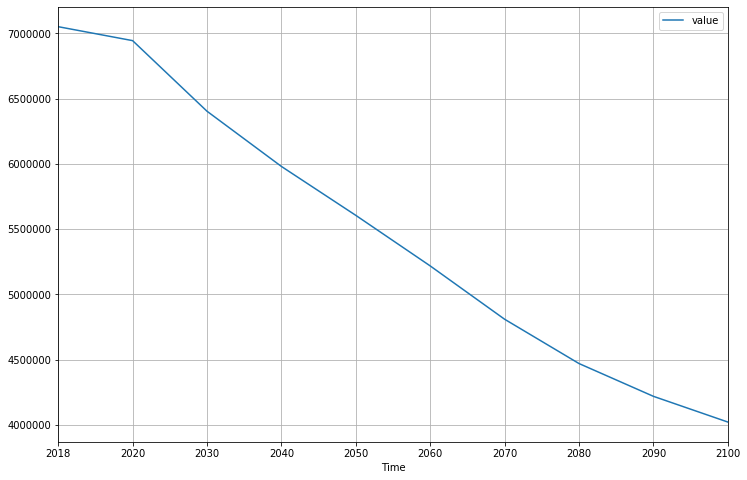

In [8]:
plot_country(name="Bulgaria")